In [0]:
#References
#https://towardsdatascience.com/dive-into-pca-principal-component-analysis-with-python-43ded13ead21
#https://dsp.stackexchange.com/questions/15823/feature-extraction-reduction-using-dwt

In [2]:
#Importing Header Files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
import math
from scipy.fftpack import fft
from scipy.stats import entropy
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import entropy
import seaborn as sns
import pywt

#Uploading files to Google Colab
from google.colab import files
uploaded = files.upload()

Saving CGMDatenumLunchPat1.csv to CGMDatenumLunchPat1 (21).csv
Saving CGMDatenumLunchPat2.csv to CGMDatenumLunchPat2 (21).csv
Saving CGMDatenumLunchPat3.csv to CGMDatenumLunchPat3 (21).csv
Saving CGMDatenumLunchPat4.csv to CGMDatenumLunchPat4 (21).csv
Saving CGMDatenumLunchPat5.csv to CGMDatenumLunchPat5 (21).csv
Saving CGMSeriesLunchPat1.csv to CGMSeriesLunchPat1 (21).csv
Saving CGMSeriesLunchPat2.csv to CGMSeriesLunchPat2 (21).csv
Saving CGMSeriesLunchPat3.csv to CGMSeriesLunchPat3 (21).csv
Saving CGMSeriesLunchPat4.csv to CGMSeriesLunchPat4 (21).csv
Saving CGMSeriesLunchPat5.csv to CGMSeriesLunchPat5 (21).csv


In [0]:
#Loading Datasets

#Time-series 
CGMDatenumLunchPat1 = pd.read_csv(io.StringIO(uploaded['CGMDatenumLunchPat1.csv'].decode('utf-8')))
CGMDatenumLunchPat2 = pd.read_csv(io.StringIO(uploaded['CGMDatenumLunchPat2.csv'].decode('utf-8')))
CGMDatenumLunchPat3 = pd.read_csv(io.StringIO(uploaded['CGMDatenumLunchPat3.csv'].decode('utf-8')))
CGMDatenumLunchPat4 = pd.read_csv(io.StringIO(uploaded['CGMDatenumLunchPat4.csv'].decode('utf-8')))
CGMDatenumLunchPat5 = pd.read_csv(io.StringIO(uploaded['CGMDatenumLunchPat5.csv'].decode('utf-8')))

#Glucose Levels
CGMSeriesLunchPat1 = pd.read_csv(io.StringIO(uploaded['CGMSeriesLunchPat1.csv'].decode('utf-8')))
CGMSeriesLunchPat2 = pd.read_csv(io.StringIO(uploaded['CGMSeriesLunchPat2.csv'].decode('utf-8')))
CGMSeriesLunchPat3 = pd.read_csv(io.StringIO(uploaded['CGMSeriesLunchPat3.csv'].decode('utf-8')))
CGMSeriesLunchPat4 = pd.read_csv(io.StringIO(uploaded['CGMSeriesLunchPat4.csv'].decode('utf-8')))
CGMSeriesLunchPat5 = pd.read_csv(io.StringIO(uploaded['CGMSeriesLunchPat5.csv'].decode('utf-8')))

In [0]:
#Data Pre-processing 
#1.Removing everything after the 30th column 

#Time-series
CGMDatenumLunchPat1 = CGMDatenumLunchPat1.loc[:, :'cgmDatenum_30']
CGMDatenumLunchPat2 = CGMDatenumLunchPat2.loc[:, :'cgmDatenum_30']
CGMDatenumLunchPat3 = CGMDatenumLunchPat3.loc[:, :'cgmDatenum_30']
CGMDatenumLunchPat4 = CGMDatenumLunchPat4.loc[:, :'cgmDatenum_30']
CGMDatenumLunchPat5 = CGMDatenumLunchPat5.loc[:, :'cgmDatenum_30']

#Glucose Levels
CGMSeriesLunchPat1 = CGMSeriesLunchPat1.loc[:, :'cgmSeries_30']
CGMSeriesLunchPat2 = CGMSeriesLunchPat2.loc[:, :'cgmSeries_30']
CGMSeriesLunchPat3 = CGMSeriesLunchPat3.loc[:, :'cgmSeries_30']
CGMSeriesLunchPat4 = CGMSeriesLunchPat4.loc[:, :'cgmSeries_30']
CGMSeriesLunchPat5 = CGMSeriesLunchPat5.loc[:, :'cgmSeries_30']


In [0]:
#2. Reversing both datasets for chronologically accurate picture

#Time-series
CGMDatenumLunchPat1 = CGMDatenumLunchPat1.iloc[:, ::-1]
CGMDatenumLunchPat2 = CGMDatenumLunchPat2.iloc[:, ::-1]
CGMDatenumLunchPat3 = CGMDatenumLunchPat3.iloc[:, ::-1]
CGMDatenumLunchPat4 = CGMDatenumLunchPat4.iloc[:, ::-1]
CGMDatenumLunchPat5 = CGMDatenumLunchPat5.iloc[:, ::-1]

#Glucose Levels 
CGMSeriesLunchPat1 = CGMSeriesLunchPat1.iloc[:, ::-1]
CGMSeriesLunchPat2 = CGMSeriesLunchPat2.iloc[:, ::-1]
CGMSeriesLunchPat3 = CGMSeriesLunchPat3.iloc[:, ::-1]
CGMSeriesLunchPat4 = CGMSeriesLunchPat4.iloc[:, ::-1]
CGMSeriesLunchPat5 = CGMSeriesLunchPat5.iloc[:, ::-1]

In [8]:
#3. Removing rows with any significant number of NaN and blank values 
x = float('NaN')
nanindex1 = []
nanindex2 = []

#Glucose levels
df = CGMSeriesLunchPat1
cgmcopy = CGMSeriesLunchPat1

#Time-series 
ddf = CGMDatenumLunchPat1
datenumcopy = CGMDatenumLunchPat1

#Omitting rows where NaN and blank values are present (Glucose Levels)
df = df.isnull().any(axis=1)
for i,j in df.iteritems():
  if (j == True):
    nanindex1.append(i)

#Printing Indexes where rows have True for NaN
print(nanindex1)

#-----------------------------------------------------

#Same for time-series
ddf = ddf.isnull().any(axis=1)
for i,j in ddf.iteritems():
  if (j == True):
    nanindex2.append(i)

print(nanindex2)

#-----------------------------------------------------
#Dropping the other csv based on indexes from other one 
cgmcopy = cgmcopy.drop(cgmcopy.index[nanindex2])
datenumcopy = datenumcopy.drop(datenumcopy.index[nanindex1])

#Dropping NaN rows from each csv's
cgmcopy = cgmcopy.dropna()
datenumcopy = datenumcopy.dropna()

#Get length of Dataframe 
print(len(cgmcopy.index))
print(len(datenumcopy.index))

[]
[]
33
33


In [9]:
#Print # of columns in cgmcopy
print(len(cgmcopy.columns))
print(len(datenumcopy.columns))

30
30


In [10]:
#Printing indexes of cgm datafile
print(list(cgmcopy.index))
print(list(datenumcopy.index))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]


In [11]:
CGMDatenumLunchPat1

,cgmDatenum_30,cgmDatenum_29,cgmDatenum_28,cgmDatenum_27,cgmDatenum_26,cgmDatenum_25,cgmDatenum_24,cgmDatenum_23,cgmDatenum_22,cgmDatenum_21,cgmDatenum_20,cgmDatenum_19,cgmDatenum_18,cgmDatenum_17,cgmDatenum_16,cgmDatenum_15,cgmDatenum_14,cgmDatenum_13,cgmDatenum_12,cgmDatenum_11,cgmDatenum_10,cgmDatenum_ 9,cgmDatenum_ 8,cgmDatenum_ 7,cgmDatenum_ 6,cgmDatenum_ 5,cgmDatenum_ 4,cgmDatenum_ 3,cgmDatenum_ 2,cgmDatenum_ 1
0,737225.483461,737225.486933,737225.490405,737225.493877,737225.497350,737225.500822,737225.504294,737225.507766,737225.511238,737225.514711,737225.518183,737225.521655,737225.525127,737225.528600,737225.532072,737225.535544,737225.539016,737225.542488,737225.545961,737225.549433,737225.552905,737225.556377,737225.559850,737225.563322,737225.566794,737225.570266,737225.573738,737225.577211,737225.580683,737225.584155
1,737217.527083,737217.530556,737217.534028,737217.537500,737217.540972,737217.544444,737217.547917,737217.551389,737217.554861,737217.558333,737217.561806,737217.565278,737217.568750,737217.572222,737217.575694,737217.579167,737217.582639,737217.586111,737217.589583,737217.593056,737217.596528,737217.600000,737217.603472,737217.606944,737217.610417,737217.613889,737217.617361,737217.620833,737217.624306,737217.627778
2,737216.450625,737216.454097,737216.457569,737216.461042,737216.464514,737216.467986,737216.471458,737216.474931,737216.478403,737216.481875,737216.485347,737216.488819,737216.492292,737216.495764,737216.499236,737216.502708,737216.506181,737216.509653,737216.513125,737216.516597,737216.520069,737216.523542,737216.527014,737216.530486,737216.533958,737216.537431,737216.540903,737216.544375,737216.547847,737216.551319
3,737215.471400,737215.474873,737215.478345,737215.481817,737215.485289,737215.488762,737215.492234,737215.495706,737215.499178,737215.502650,737215.506123,737215.509595,737215.513067,737215.516539,737215.520012,737215.523484,737215.526956,737215.530428,737215.533900,737215.537373,737215.540845,737215.544317,737215.547789,737215.551262,737215.554734,737215.558206,737215.561678,737215.565150,737215.568623,737215.572095
4,737201.488715,737201.492188,737201.495660,737201.499132,737201.502604,737201.506076,737201.509549,737201.513021,737201.516493,737201.519965,737201.523438,737201.526910,737201.530382,737201.533854,737201.537326,737201.540799,737201.544271,737201.547743,737201.551215,737201.554688,737201.558160,737201.561632,737201.565104,737201.568576,737201.572049,737201.575521,737201.578993,737201.582465,737201.585938,737201.589410
5,737196.506713,737196.510185,737196.513657,737196.517130,737196.520602,737196.524074,737196.527546,737196.531019,737196.534491,737196.537963,737196.541435,737196.544907,737196.548380,737196.551852,737196.555324,737196.558796,737196.562269,737196.565741,737196.569213,737196.572685,737196.576157,737196.579630,737196.583102,737196.586574,737196.590046,737196.593542,737196.597014,737196.600486,737196.603958,737196.607431
6,737140.485463,737140.488935,737140.492407,737140.495891,737140.499363,737140.502836,737140.506308,737140.509780,737140.513252,737140.516725,737140.520197,737140.523669,737140.527141,737140.530613,737140.534086,737140.537558,737140.541030,737140.544502,737140.547975,737140.551447,737140.554919,737140.558391,737140.561863,737140.565336,737140.568808,737140.572280,737140.575752,737140.579225,737140.582697,737140.586169
7,737120.471551,737120.475023,737120.478495,737120.481968,737120.485440,737120.488912,737120.492384,737120.495856,737120.499329,737120.502801,737120.506273,737120.509745,737120.513218,737120.516690,737120.520162,737120.523634,737120.527106,737120.530579,737120.534051,737120.537523,737120.540995,737120.544468,737120.547940,737120.551412,737120.554884,737120.558356,737120.561829,737120.565301,737120.568773,737120.572245
8,737117.471377,737117.474850,737117.478322,737117.481794,737117.485266,737117.488738,737117.492211,737117.495683,737117.499155,737117.502627,737117.506100,737117.509572,737117.513044,737117.516516,73711

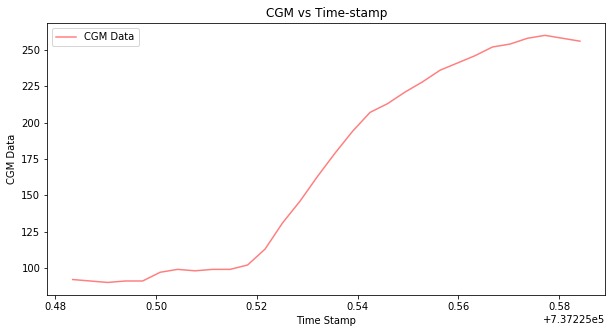

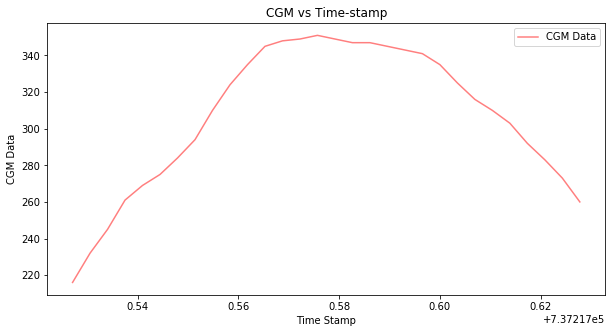

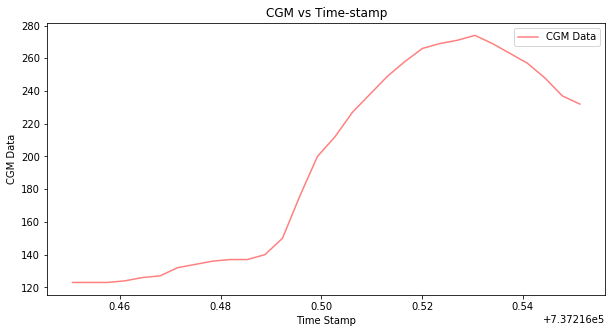

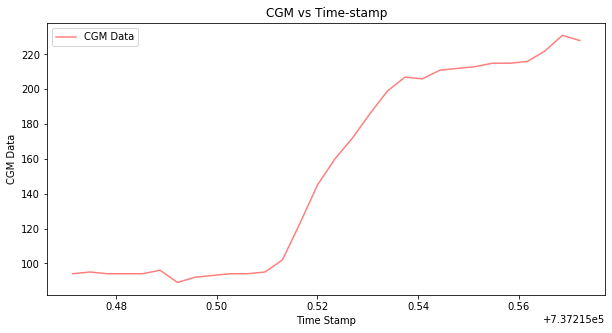

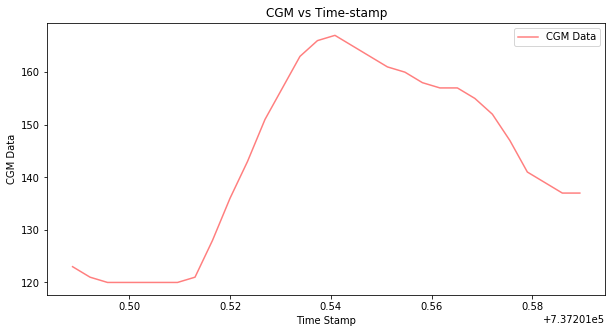

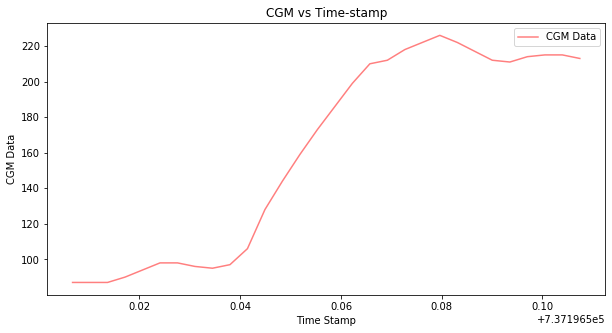

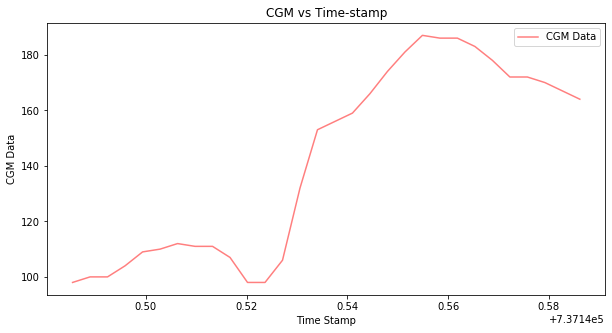

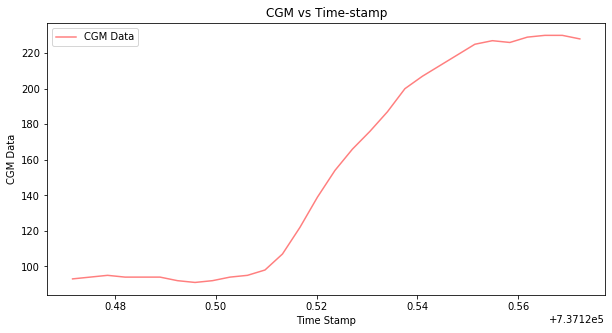

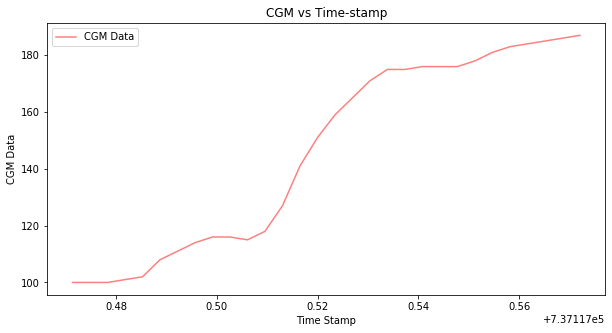

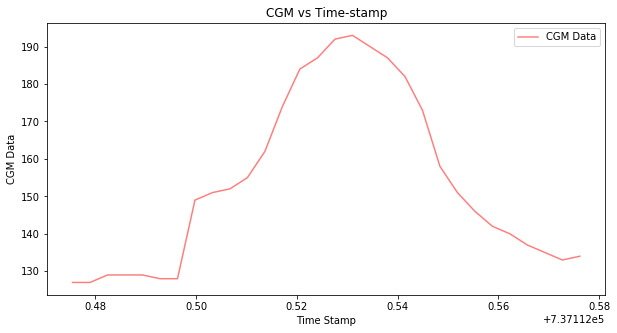

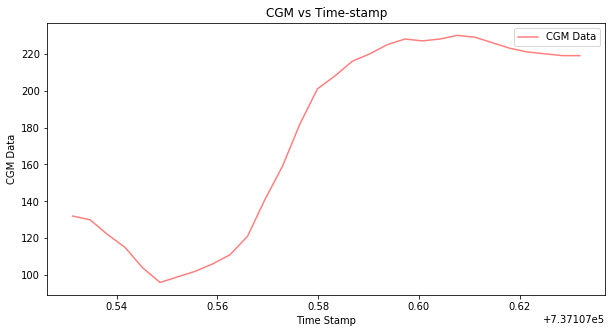

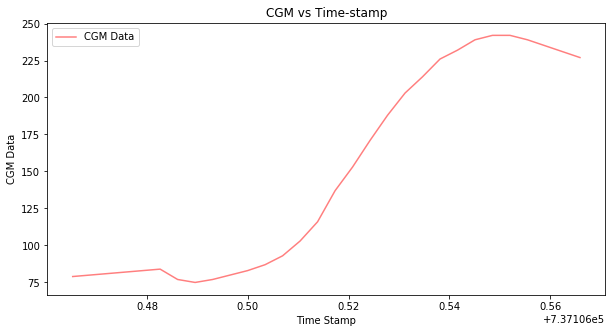

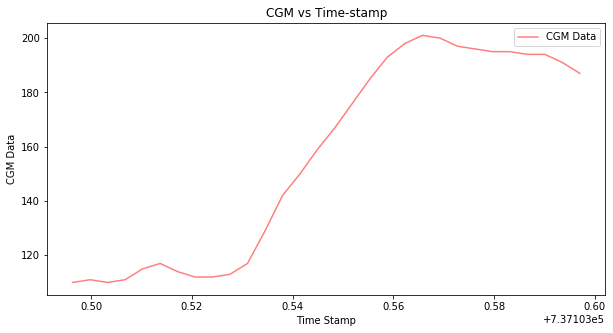

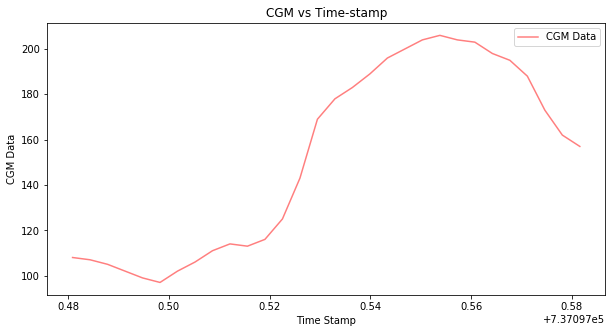

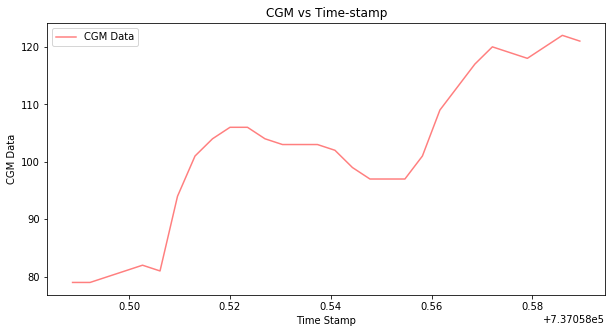

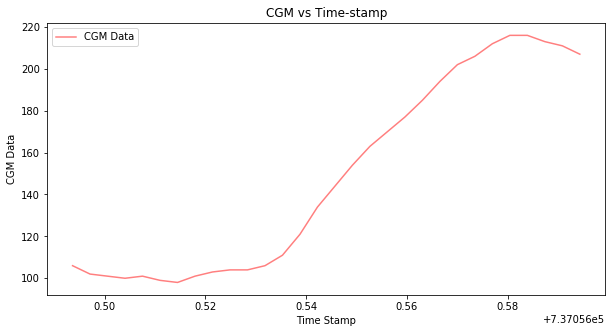

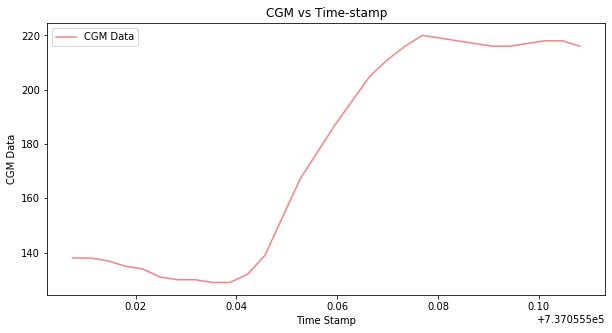

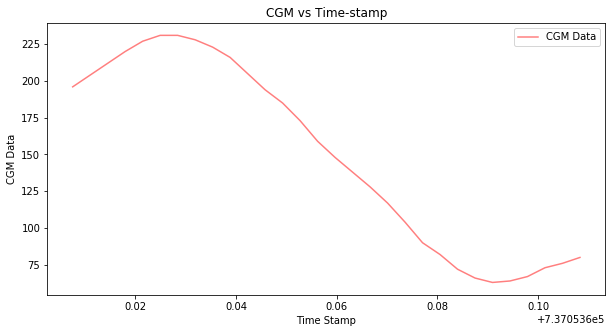

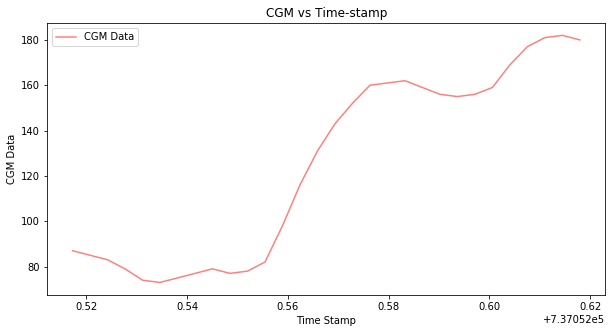

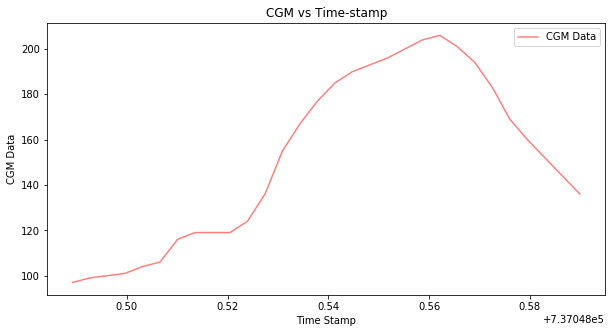

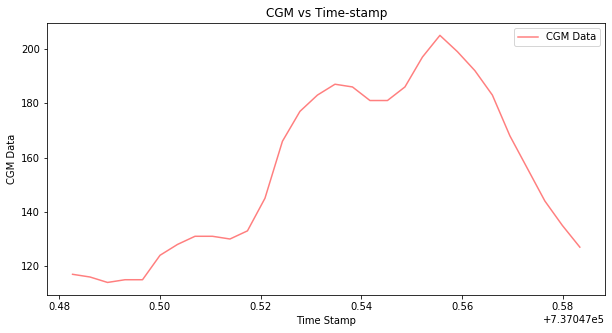

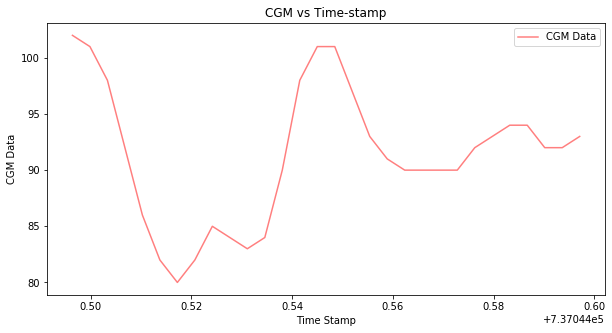

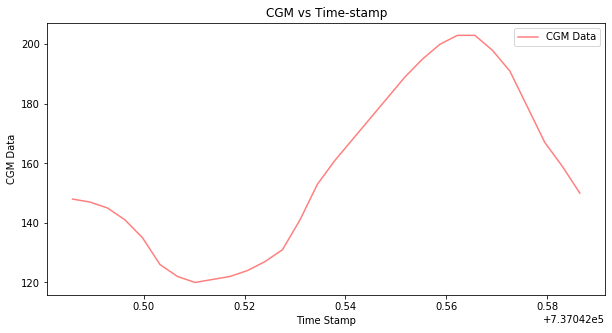

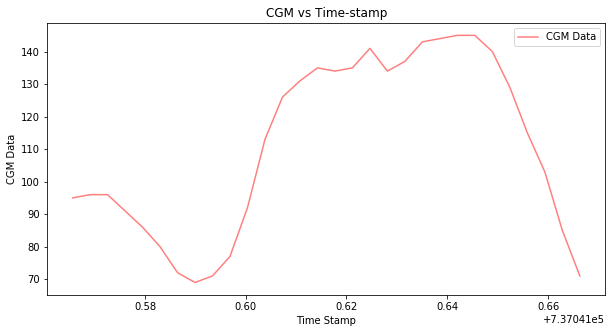

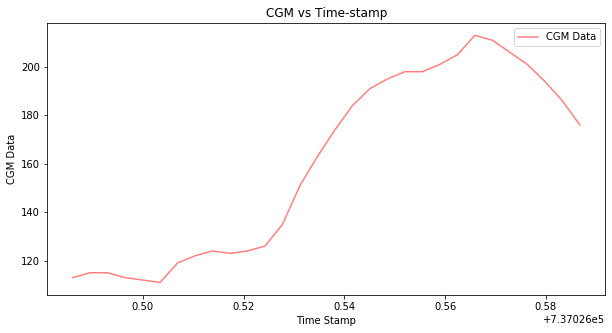

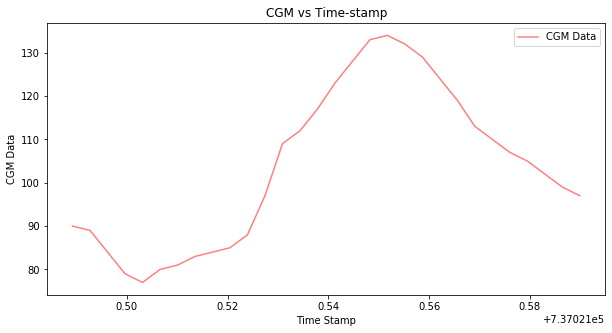

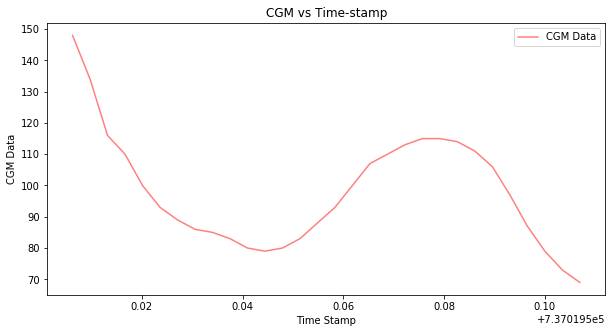

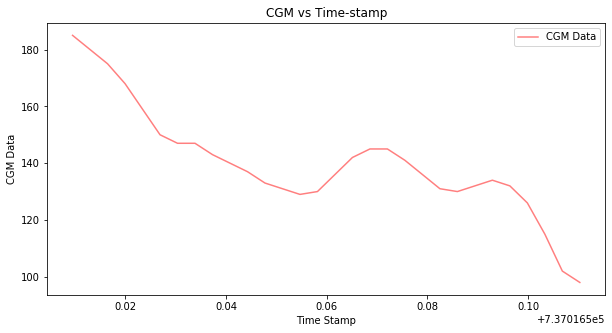

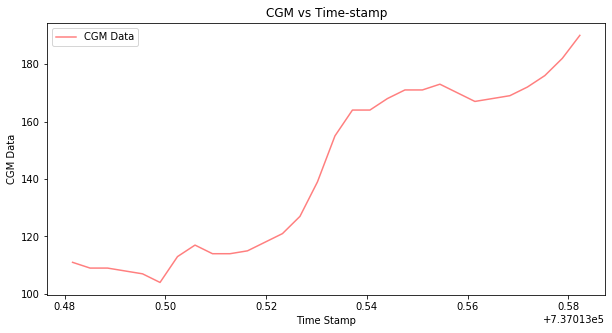

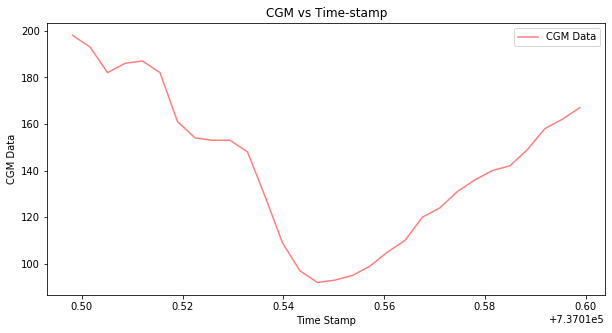

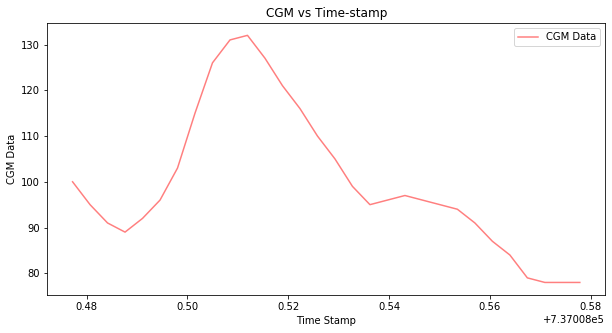

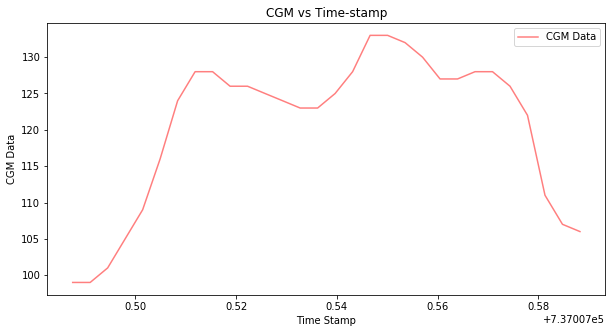

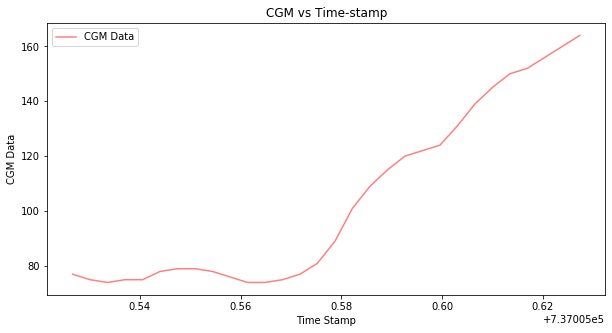

In [12]:
#Plotting Graphs 

#print(datenumcopy.iloc[0], cgmcopy.iloc[0])
for i in range(len(cgmcopy)):
  plt.figure(figsize=(10,5))
  plt.xlabel("Time Stamp")
  plt.ylabel("CGM Data")
  plt.title("CGM vs Time-stamp")
  plt.plot(datenumcopy.iloc[i], cgmcopy.iloc[i], c='r', alpha=0.5, label = 'CGM Data')
  plt.legend()
  plt.show()

In [14]:
############### FEATURE EXTRACTION ###############
#1. Fast Fourier Transform 

#Calculating fft values for each row 
updatedfeatureMatrix = pd.DataFrame()
FFT = pd.DataFrame().reindex_like(datenumcopy)
for i in range(len(cgmcopy)):
  FFT.iloc[i] = fft(cgmcopy.iloc[i])

#Displaying calculated fft dataframe
FFT

,cgmDatenum_30,cgmDatenum_29,cgmDatenum_28,cgmDatenum_27,cgmDatenum_26,cgmDatenum_25,cgmDatenum_24,cgmDatenum_23,cgmDatenum_22,cgmDatenum_21,cgmDatenum_20,cgmDatenum_19,cgmDatenum_18,cgmDatenum_17,cgmDatenum_16,cgmDatenum_15,cgmDatenum_14,cgmDatenum_13,cgmDatenum_12,cgmDatenum_11,cgmDatenum_10,cgmDatenum_ 9,cgmDatenum_ 8,cgmDatenum_ 7,cgmDatenum_ 6,cgmDatenum_ 5,cgmDatenum_ 4,cgmDatenum_ 3,cgmDatenum_ 2,cgmDatenum_ 1
0,5105.000000-0.000000j,-69.786739+1295.095237j,-37.968189+312.936737j,-146.113969+287.089869j,-65.197377+200.361665j,-75.500000+135.965988j,-90.163119+101.828560j,-76.735278+92.001219j,-87.351471+65.258283j,-82.386031+60.462032j,-74.500000+52.827550j,-77.005057+35.388259j,-82.336881+28.760989j,-83.472926+9.683738j,-82.482963+9.228133j,-83.000000-0.000000j,-82.482963-9.228133j,-83.472926-9.683738j,-82.336881-28.760989j,-77.005057-35.388259j,-74.500000-52.827550j,-82.386031-60.462032j,-87.351471-65.258283j,-76.735278-92.001219j,-90.163119-101.828560j,-75.500000-135.965988j,-65.197377-200.361665j,-146.113969-287.089869j,-37.968189-312.936737j,-69.786739-1295.095237j
1,9207.000000-0.000000j,-774.331933+143.770259j,-142.350435+113.274097j,-47.562306+12.310734j,-90.530119+26.947567j,-61.000000+27.712813j,-30.236068+27.976666j,-30.084962+26.359246j,-31.218449+17.013119j,-27.437694+2.906170j,-21.000000+10.392305j,-19.119284-1.793057j,-25.763932+1.518597j,-25.463822+3.014570j,-24.900997+2.315450j,-25.000000-0.000000j,-24.900997-2.315450j,-25.463822-3.014570j,-25.763932-1.518597j,-19.119284+1.793057j,-21.000000-10.392305j,-27.437694-2.906170j,-31.218449-17.013119j,-30.084962-26.359246j,-30.236068-27.976666j,-61.000000-27.712813j,-90.530119-26.947567j,-47.562306-12.310734j,-142.350435-113.274097j,-774.331933-143.770259j
2,5858.000000-0.000000j,-248.579056+1174.805268j,-122.651999+118.741796j,-126.721360+186.114097j,-12.914013+111.793650j,-74.500000+63.219854j,-48.909830+89.187310j,-52.189848+41.730546j,-56.131666+51.658078j,-37.278640+37.437185j,-59.500000+35.507042j,-51.307935+23.362859j,-60.090170+13.062300j,-50.923161+17.530559j,-56.302322+7.211707j,-52.000000-0.000000j,-56.302322-7.211707j,-50.923161-17.530559j,-60.090170-13.062300j,-51.307935-23.362859j,-59.500000-35.507042j,-37.278640-37.437185j,-56.131666-51.658078j,-52.189848-41.730546j,-48.909830-89.187310j,-74.500000-63.219854j,-12.914013-111.793650j,-126.721360-186.114097j,-122.651999-118.741796j,-248.579056-1174.805268j
3,4587.000000-0.000000j,-22.835104+1090.604627j,-5.271423+149.302841j,-77.500000+264.701029j,-41.863196+153.075038j,-85.500000+116.913430j,-65.500000+126.311271j,-72.041065+56.070677j,-73.312169+63.904291j,-77.500000+34.869262j,-73.500000+32.042940j,-62.186182+34.339881j,-65.500000+18.919908j,-59.937649+4.837348j,-63.553212+2.221735j,-75.000000-0.000000j,-63.553212-2.221735j,-59.937649-4.837348j,-65.500000-18.919908j,-62.186182-34.339881j,-73.500000-32.042940j,-77.500000-34.869262j,-73.312169-63.904291j,-72.041065-56.070677j,-65.500000-126.311271j,-85.500000-116.913430j,-41.863196-153.075038j,-77.500000-264.701029j,-5.271423-149.302841j,-22.835104-1090.604627j
4,4305.000000-0.000000j,-284.058057+195.280546j,46.858537+63.645597j,-11.927051-26.576582j,-0.031797+12.974563j,-4.500000+19.918584j,-0.954915+19.331401j,-5.572131+5.083489j,-6.688840+4.198308j,-8.572949+5.910609j,-4.500000+4.330127j,-2.033072+2.405232j,-6.545085+2.747168j,-8.836739+3.825116j,-5.637900+1.422309j,-9.000000-0.000000j,-5.637900-1.422309j,-8.836739-3.825116j,-6.545085-2.747168j,-2.033072-2.405232j,-4.500000-4.330127j,-8.572949-5.910609j,-6.688840-4.198308j,-5.572131-5.083489j,-0.954915-19.331401j,-4.500000-19.918584j,-0.031797-12.974563j,-11.927051+26.576582j,46.858537-63.645597j,-284.058057-195.280546j
5,4831.000000-0.000000j,-311.256337+1049.979384j,24.947057+169.279369j,-100.697561+187.877453j,-69.310200+197.463421j,-56.000000+121.243557j,-71.927051+60.537102j,-56.251277+76.266635j,-60.916680+52.112439j,-63.802439+40.290354j,-65.000000+43.301270j,-57.772486+23.958831j,-68.57

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


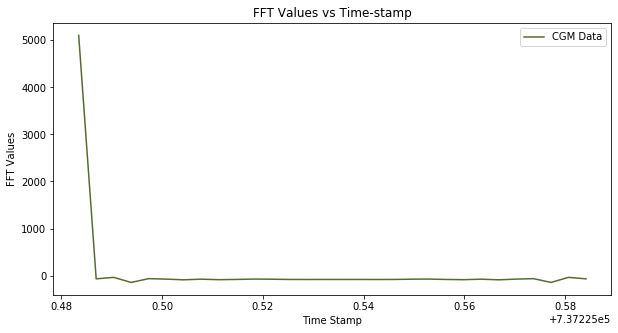

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


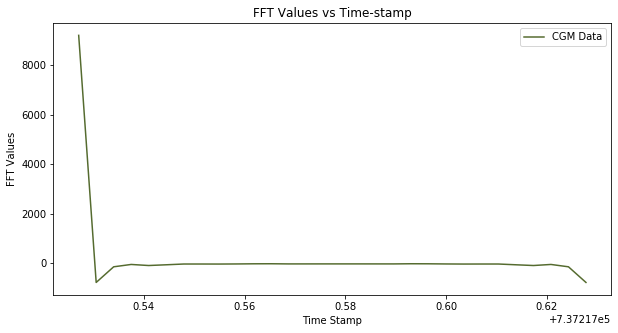

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


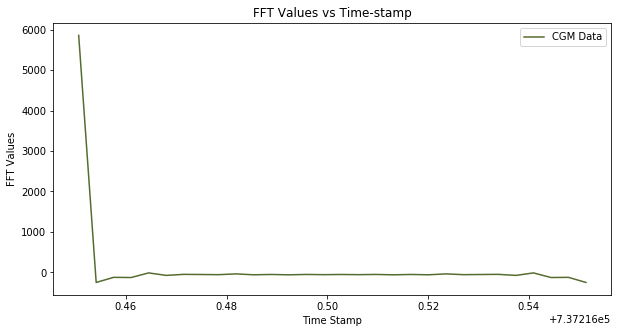

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


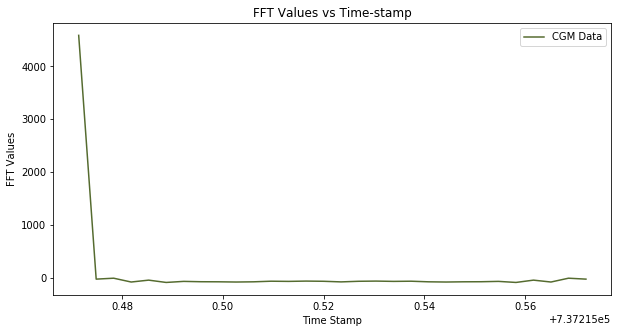

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


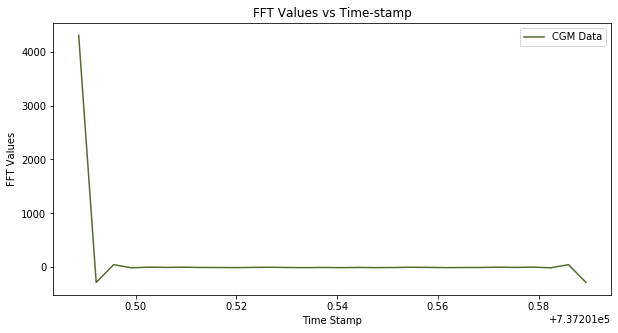

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


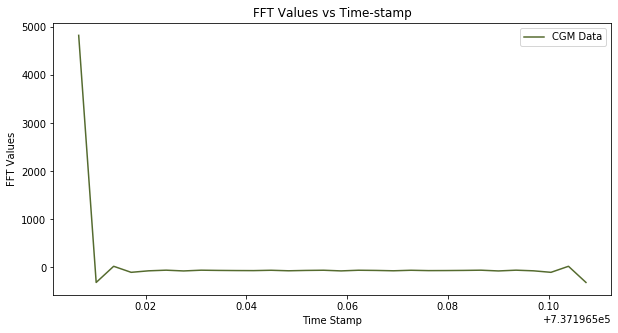

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


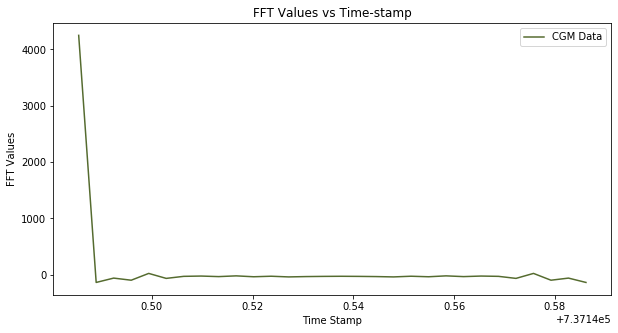

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


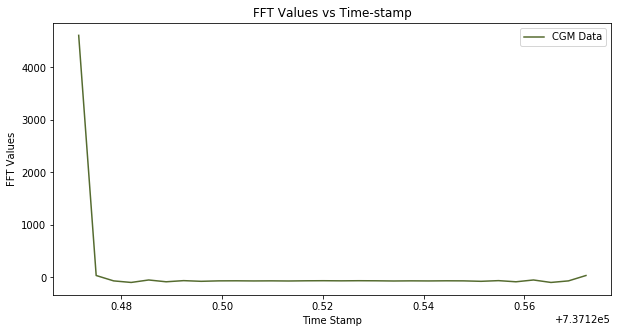

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


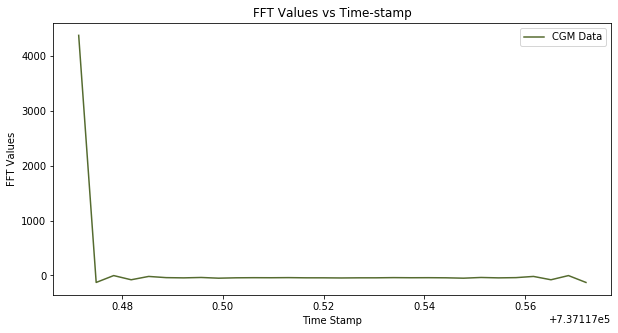

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


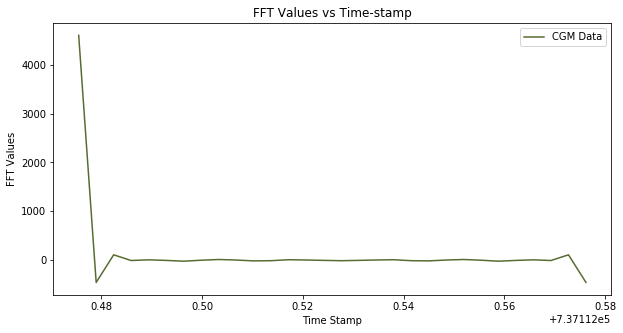

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


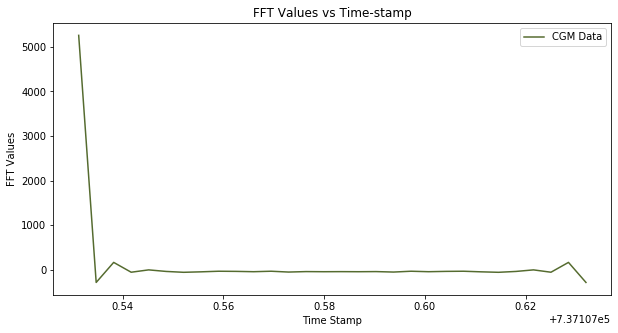

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


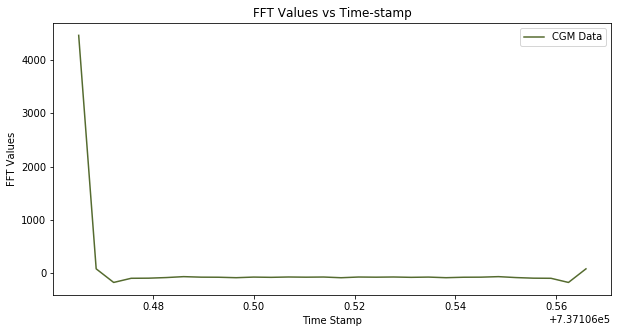

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


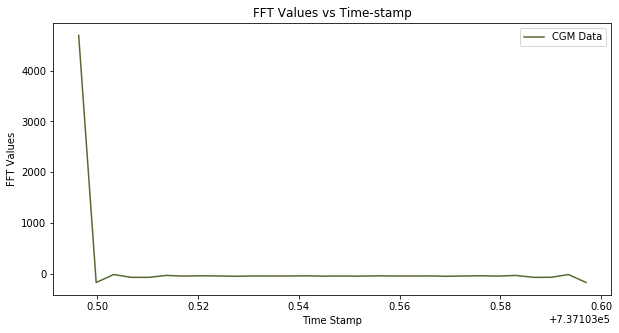

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


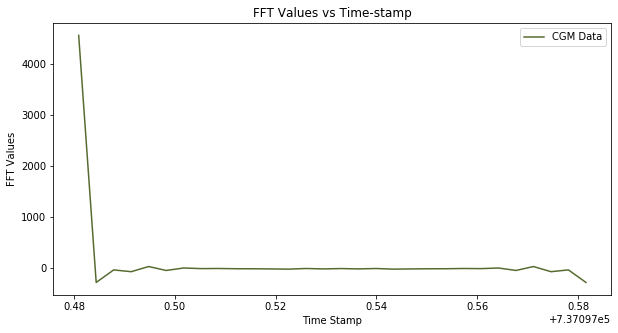

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


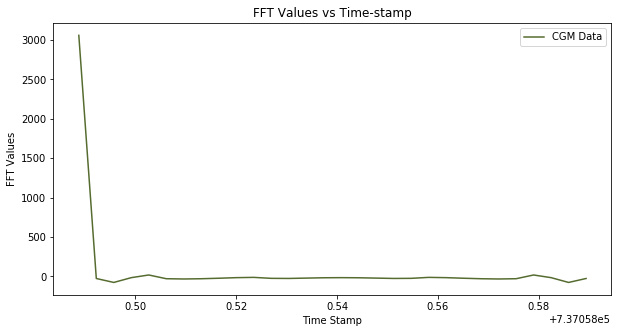

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


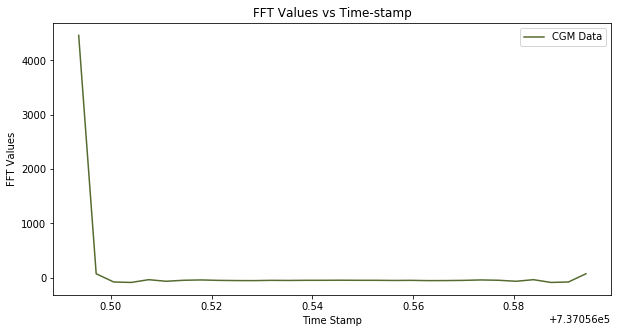

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


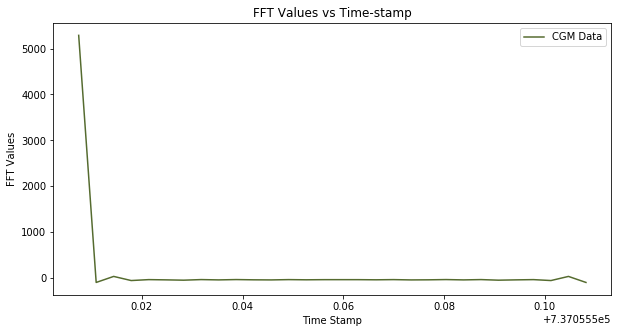

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


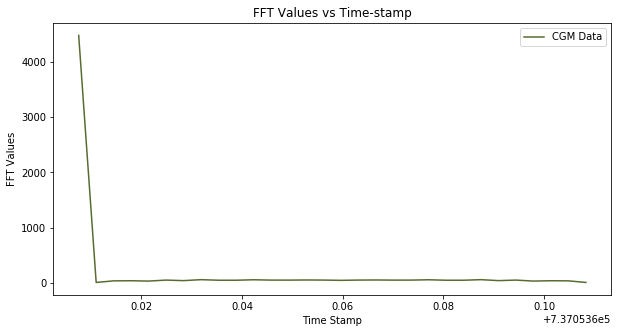

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


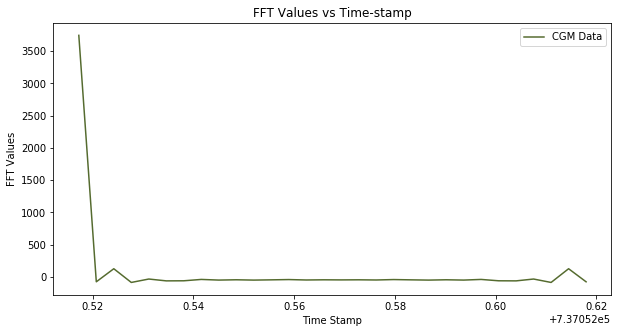

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


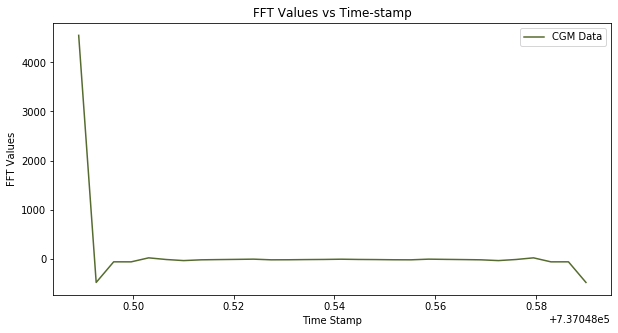

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


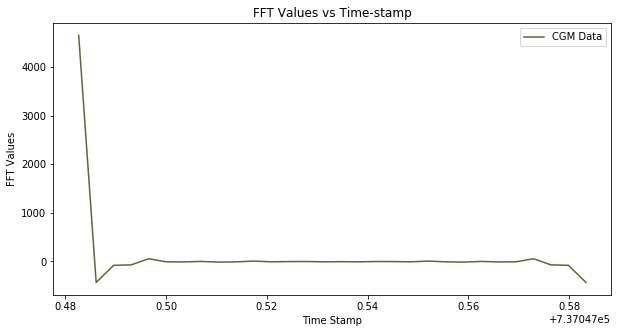

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


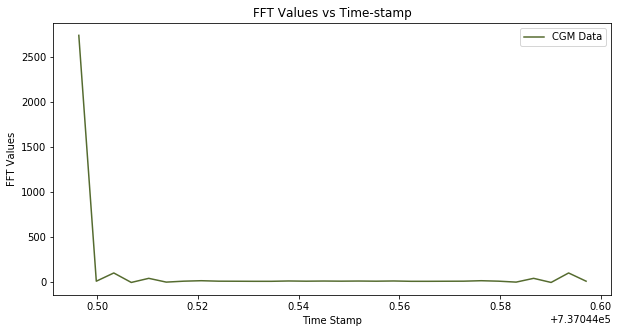

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


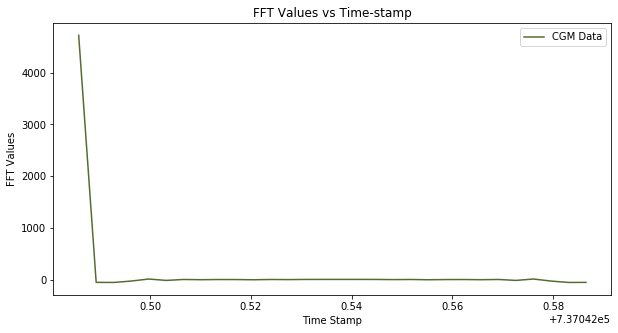

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


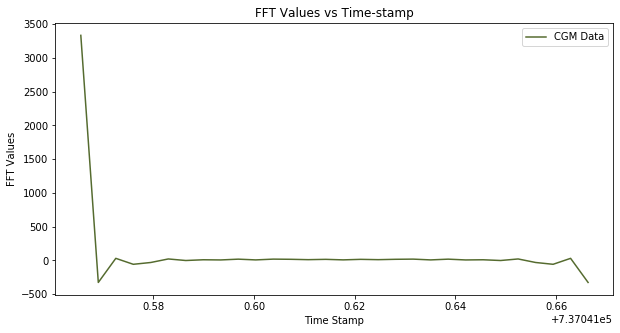

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


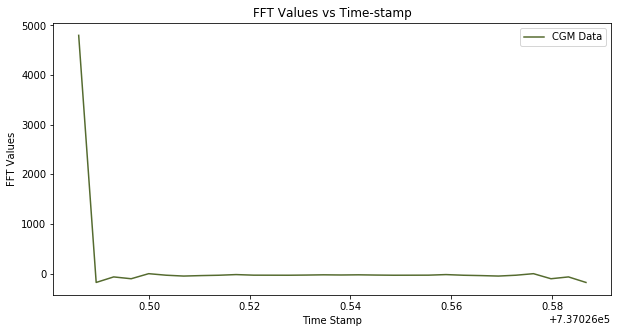

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


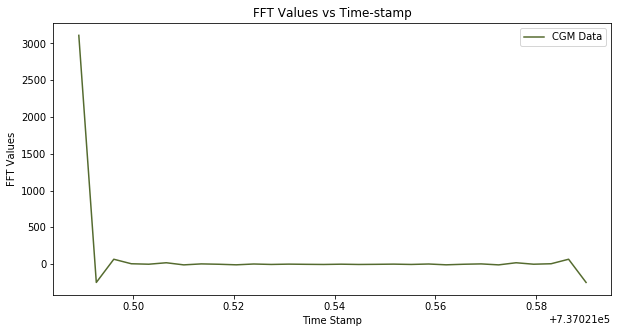

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


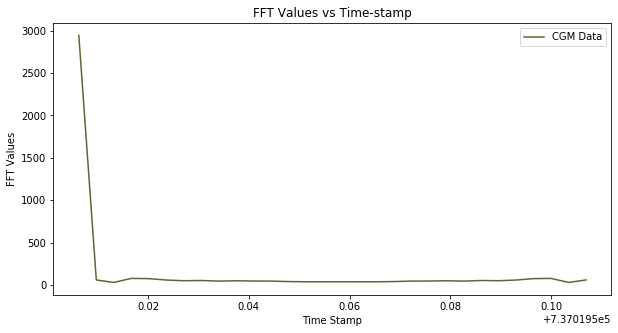

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


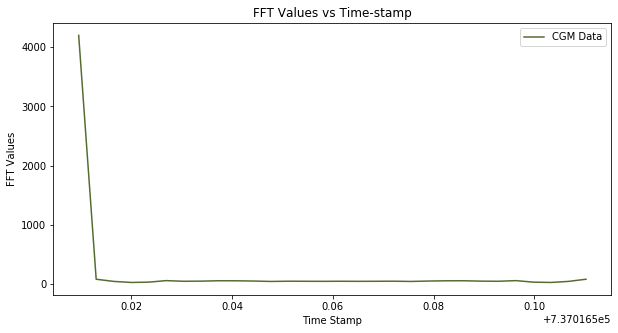

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


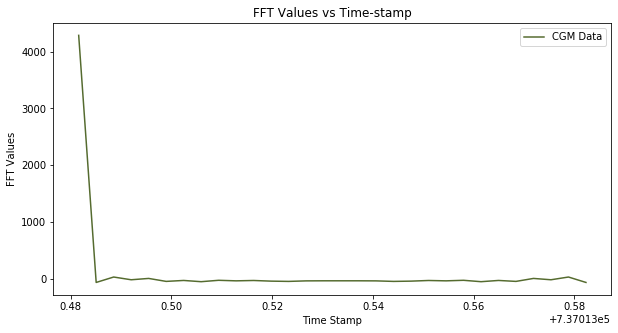

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


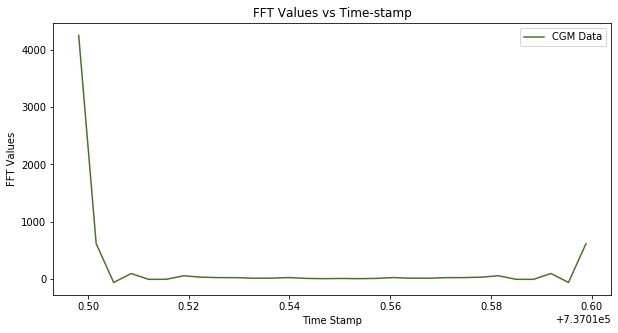

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


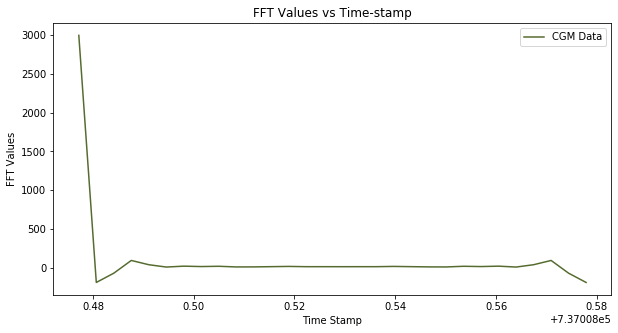

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


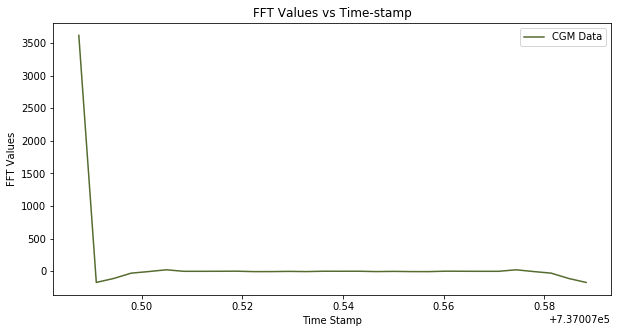

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


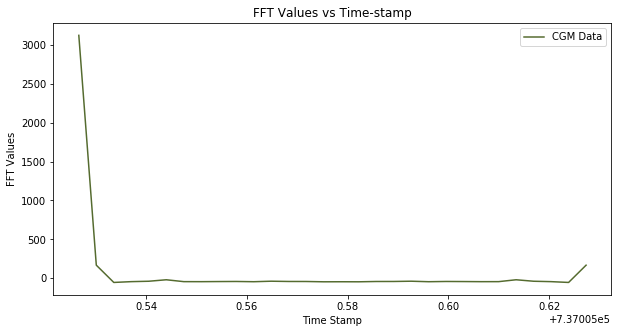

In [15]:
#Visualizing FFT Values 
for i in range(len(datenumcopy)):
  plt.figure(figsize=(10,5))
  plt.xlabel("Time Stamp")
  plt.ylabel("FFT Values")
  plt.title("FFT Values vs Time-stamp")
  plt.plot(datenumcopy.iloc[i], FFT.iloc[i], c='darkolivegreen', label = 'CGM Data')
  plt.legend()
  plt.show()

In [16]:
#Inserting FFT values in the feature matrix

#Function to calculate top 5 fft values 
def calculateFFT(row):
    fftvalues = fft((row))
    fftvalues.sort()
    return np.flip(fftvalues)[0:5]

#Calculating fft values for each row
fftvalues = pd.DataFrame()
fftvalues['top5FFT'] = cgmcopy.apply(lambda row: abs(calculateFFT(row)), axis=1)
newFFT = pd.DataFrame(fftvalues.top5FFT.tolist(), columns=['FFT1', 'FFT2', 'FFT3', 'FFT4', 'FFT5'])
newFFT

#Inserting features in feature matrix
updatedfeatureMatrix['FFT1']= newFFT['FFT1']
updatedfeatureMatrix['FFT2']= newFFT['FFT2']
updatedfeatureMatrix['FFT3']= newFFT['FFT3']
updatedfeatureMatrix['FFT4']= newFFT['FFT4']
updatedfeatureMatrix['FFT5']= newFFT['FFT5']
updatedfeatureMatrix['FFT1']= newFFT['FFT1']
updatedfeatureMatrix

,FFT1,FFT2,FFT3,FFT4,FFT5
0,5105.0,315.231637,315.231637,210.702384,210.702384
1,9207.0,19.203178,19.203178,23.430749,23.430749
2,5858.0,112.537069,112.537069,52.832186,52.832186
3,4587.0,149.395871,149.395871,1090.843661,1090.843661
4,4305.0,79.034704,79.034704,12.974602,12.974602
5,4831.0,171.107745,171.107745,133.551488,133.551488
6,4250.0,117.752258,117.752258,27.639121,27.639121
7,4611.0,1126.411906,1126.411906,159.053810,159.053810
8,4377.0,149.284235,149.284235,104.404490,104.404490
9,4604.0,110.315508,110.315508,13.312085,13.312085


In [17]:
#2. Discrete Wavelet Transform

#Computing Coefficients and Reconstructed Signal using Soft Thresholding
(ca, cd) = pywt.dwt(cgmcopy,'haar')
cat = pywt.threshold(ca, np.std(ca)/2, mode='soft')
cdt = pywt.threshold(cd, np.std(cd)/2, mode='soft')
ts_rec = pywt.idwt(cat, cdt, 'haar')
dddf = pd.DataFrame(ts_rec)
dddf.columns = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','AA','AB','AC','AD']
maxdwt = dddf.max(axis = 1)

#Inserting features in feature matrix
updatedfeatureMatrix['DWT'] = maxdwt
updatedfeatureMatrix

,FFT1,FFT2,FFT3,FFT4,FFT5,DWT
0,5105.0,315.231637,315.231637,210.702384,210.702384,231.745084
1,9207.0,19.203178,19.203178,23.430749,23.430749,322.745084
2,5858.0,112.537069,112.537069,52.832186,52.832186,245.245084
3,4587.0,149.395871,149.395871,1090.843661,1090.843661,202.245084
4,4305.0,79.034704,79.034704,12.974602,12.974602,139.245084
5,4831.0,171.107745,171.107745,133.551488,133.551488,197.081030
6,4250.0,117.752258,117.752258,27.639121,27.639121,159.245084
7,4611.0,1126.411906,1126.411906,159.053810,159.053810,202.245084
8,4377.0,149.284235,149.284235,104.404490,104.404490,159.245084
9,4604.0,110.315508,110.315508,13.312085,13.312085,164.245084


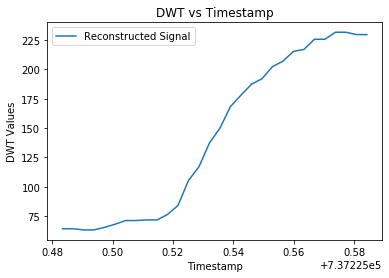

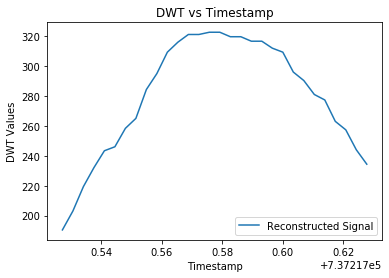

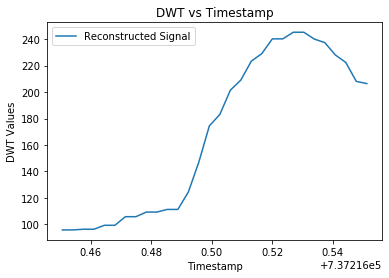

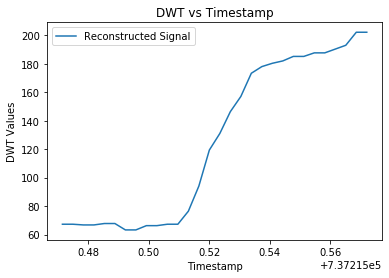

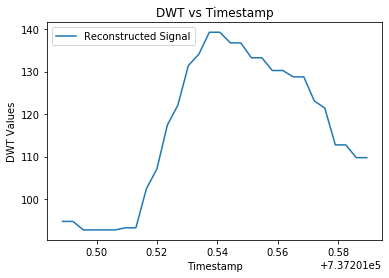

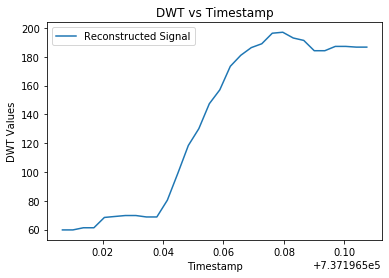

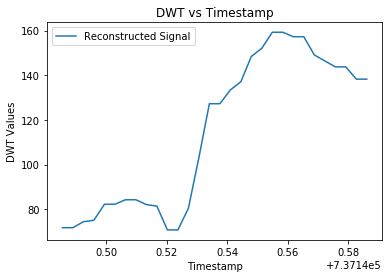

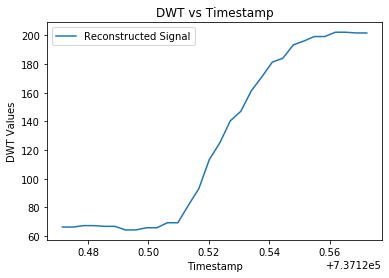

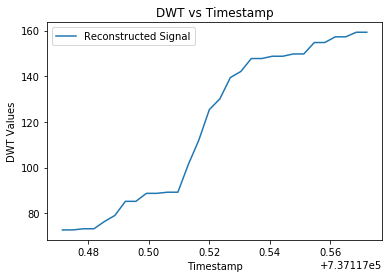

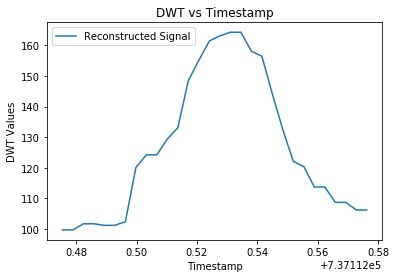

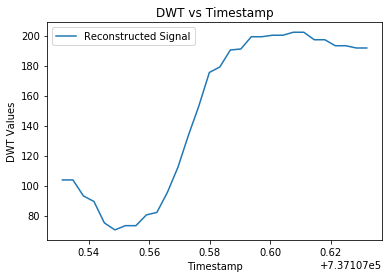

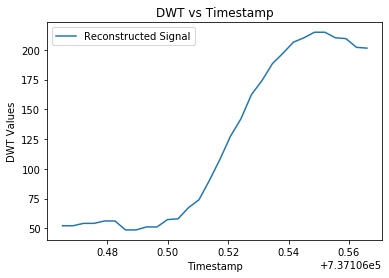

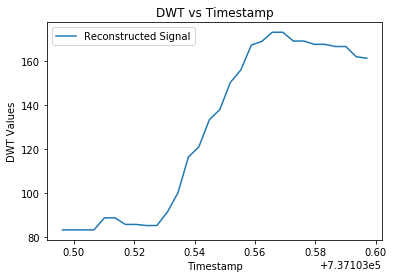

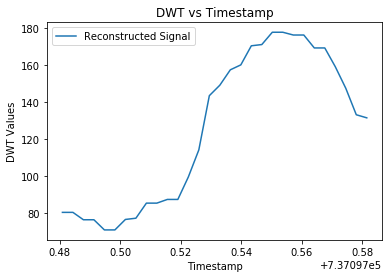

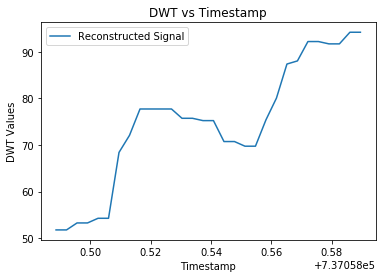

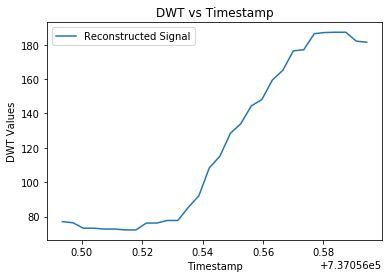

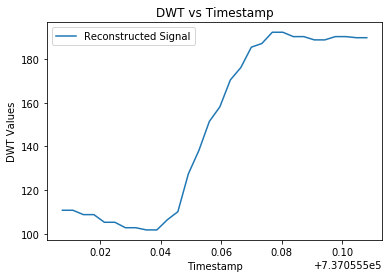

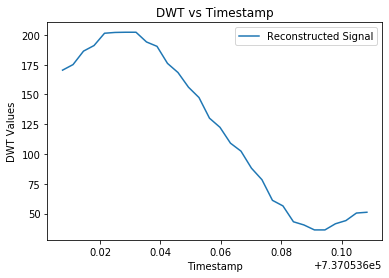

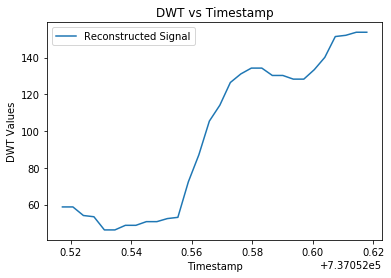

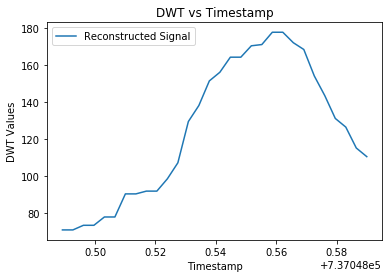

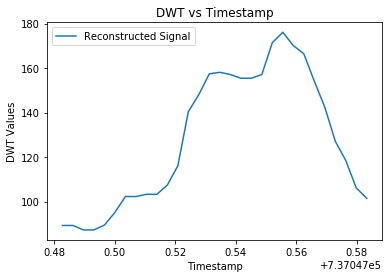

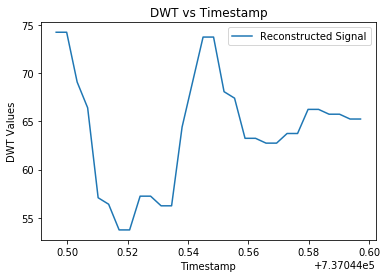

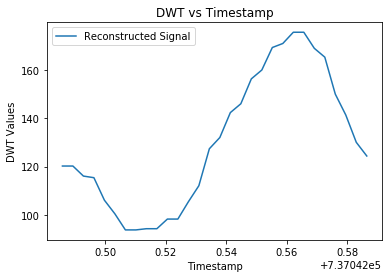

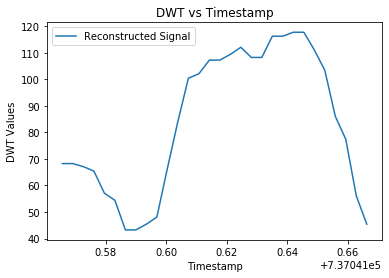

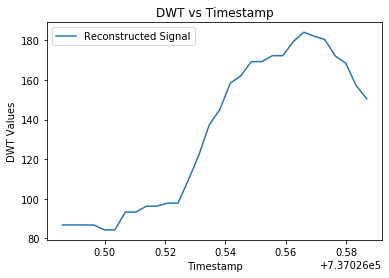

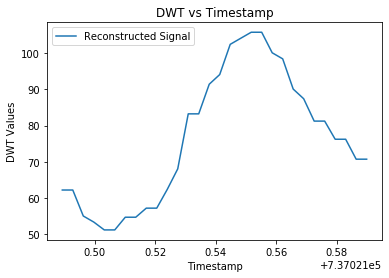

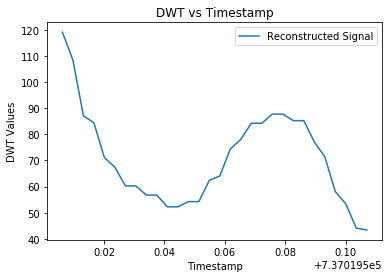

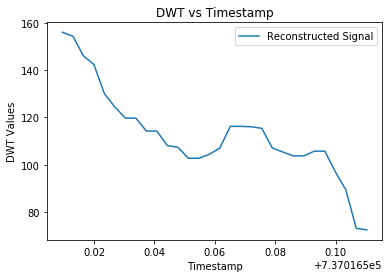

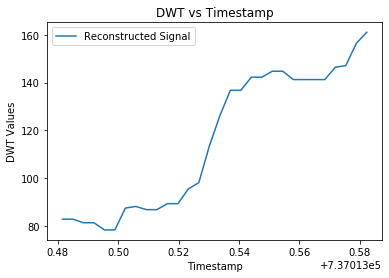

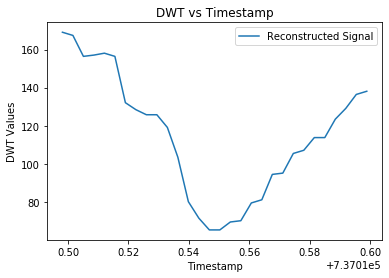

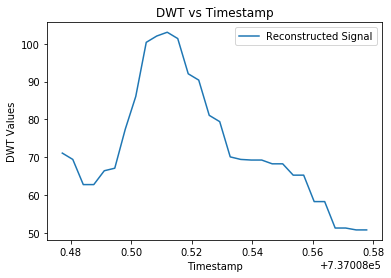

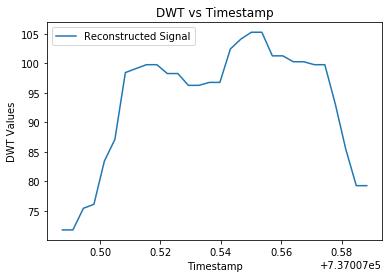

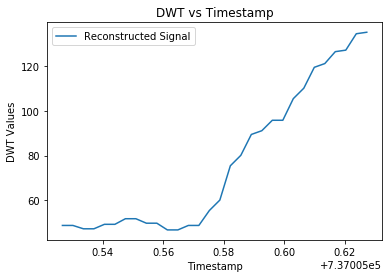

In [18]:
#Plotting DWT vs Time Graphs
for i in range(len(cgmcopy)):
  plt.plot(datenumcopy.iloc[i], dddf.iloc[i], label = 'Reconstructed Signal')
  plt.title('DWT vs Timestamp')
  plt.xlabel("Timestamp")
  plt.ylabel("DWT Values")
  plt.legend()
  plt.show()

In [19]:
#3. Moving Average [30 min intervals]

#Calculting averages for discrete 30 minute intervals 
meanFrame = pd.DataFrame()
for i in range(0,30,6):
  meanFrame['Mean ' + str(i)+"-"+str(i + 6)] = cgmcopy.iloc[:, i :i + 6].mean(axis = 1)
meanFrame

#Inserting features in feature matrix
updatedfeatureMatrix['mean0-6']= meanFrame['Mean 0-6']
updatedfeatureMatrix['mean6-12']= meanFrame['Mean 6-12']
updatedfeatureMatrix['mean12-18']= meanFrame['Mean 12-18']
updatedfeatureMatrix['mean18-24']= meanFrame['Mean 18-24']
updatedfeatureMatrix['mean24-30']= meanFrame['Mean 24-30']

#Displaying updated feature matrix
updatedfeatureMatrix

,FFT1,FFT2,FFT3,FFT4,FFT5,DWT,mean0-6,mean6-12,mean12-18,mean18-24,mean24-30
0,5105.0,315.231637,315.231637,210.702384,210.702384,231.745084,92.000000,101.666667,170.000000,230.833333,256.333333
1,9207.0,19.203178,19.203178,23.430749,23.430749,322.745084,249.666667,315.333333,348.500000,334.166667,286.833333
2,5858.0,112.537069,112.537069,52.832186,52.832186,245.245084,124.333333,136.000000,200.500000,264.500000,251.000000
3,4587.0,149.395871,149.395871,1090.843661,1090.843661,202.245084,94.500000,92.833333,148.000000,208.000000,221.166667
4,4305.0,79.034704,79.034704,12.974602,12.974602,139.245084,120.666667,133.166667,163.500000,158.000000,142.166667
5,4831.0,171.107745,171.107745,133.551488,133.551488,197.081030,90.500000,103.333333,178.500000,219.500000,213.333333
6,4250.0,117.752258,117.752258,27.639121,27.639121,159.245084,103.500000,106.166667,145.333333,182.833333,170.500000
7,4611.0,1126.411906,1126.411906,159.053810,159.053810,202.245084,94.000000,93.666667,144.000000,208.500000,228.333333
8,4377.0,149.284235,149.284235,104.404490,104.404490,159.245084,101.833333,115.000000,152.333333,176.000000,184.333333
9,4604.0,110.315508,110.315508,13.312085,13.312085,164.245084,128.166667,149.500000,186.666667,166.166667,136.833333


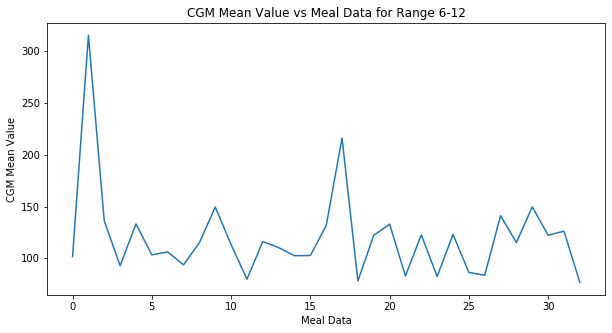

In [20]:
#Plotting Individual CGM Mean vs Meal Data
plt.figure(figsize=(10,5))
plt.plot(updatedfeatureMatrix['mean6-12'])
plt.xlabel("Meal Data")
plt.ylabel("CGM Mean Value")
plt.title("CGM Mean Value vs Meal Data for Range 6-12")
plt.show()

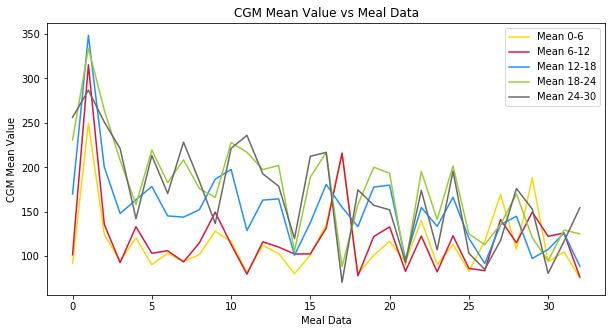

In [21]:
#Plotting all of CGM Mean vs Meal Data
plt.figure(figsize=(10,5))
plt.plot(updatedfeatureMatrix['mean0-6'], color = 'gold')
plt.plot(updatedfeatureMatrix['mean6-12'], color = 'crimson')
plt.plot(updatedfeatureMatrix['mean12-18'], color = 'dodgerblue')
plt.plot(updatedfeatureMatrix['mean18-24'], color = 'yellowgreen')
plt.plot(updatedfeatureMatrix['mean24-30'], color = 'dimgray')
plt.xlabel("Meal Data")
plt.ylabel("CGM Mean Value")
plt.title("CGM Mean Value vs Meal Data")
plt.legend(('Mean 0-6', 'Mean 6-12', 'Mean 12-18','Mean 18-24','Mean 24-30'),loc='upper right')
plt.show()

In [22]:
#4.CGM Velocity [Rolling 30 min intervals]

#Calculating windowed velocity for each row and taking the maximum value 
velocityFrame = pd.DataFrame() 
for i in range(0,25):
  velocityFrame['Velocity '+ str(i+1)+"-"+ str(i+5)] = ((cgmcopy.iloc[: , i + 5]) - (cgmcopy.iloc[: , i]))/((datenumcopy.iloc[: , i + 5]) - (datenumcopy.iloc[: , i]))
velocityFrame

#Inserting features in the feature matrix
updatedfeatureMatrix['maximumVelocity']= velocityFrame.max(axis = 1)
updatedfeatureMatrix

,FFT1,FFT2,FFT3,FFT4,FFT5,DWT,mean0-6,mean6-12,mean12-18,mean18-24,mean24-30,maximumVelocity
0,5105.0,315.231637,315.231637,210.702384,210.702384,231.745084,92.000000,101.666667,170.000000,230.833333,256.333333,4665.599997
1,9207.0,19.203178,19.203178,23.430749,23.430749,322.745084,249.666667,315.333333,348.500000,334.166667,286.833333,3513.600045
2,5858.0,112.537069,112.537069,52.832186,52.832186,245.245084,124.333333,136.000000,200.500000,264.500000,251.000000,5068.800064
3,4587.0,149.395871,149.395871,1090.843661,1090.843661,202.245084,94.500000,92.833333,148.000000,208.000000,221.166667,4838.400061
4,4305.0,79.034704,79.034704,12.974602,12.974602,139.245084,120.666667,133.166667,163.500000,158.000000,142.166667,2073.599901
5,4831.0,171.107745,171.107745,133.551488,133.551488,197.081030,90.500000,103.333333,178.500000,219.500000,213.333333,4608.000058
6,4250.0,117.752258,117.752258,27.639121,27.639121,159.245084,103.500000,106.166667,145.333333,182.833333,170.500000,3513.600045
7,4611.0,1126.411906,1126.411906,159.053810,159.053810,202.245084,94.000000,93.666667,144.000000,208.500000,228.333333,3974.399997
8,4377.0,149.284235,149.284235,104.404490,104.404490,159.245084,101.833333,115.000000,152.333333,176.000000,184.333333,2707.200016
9,4604.0,110.315508,110.315508,13.312085,13.312085,164.245084,128.166667,149.500000,186.666667,166.166667,136.833333,2126.946030


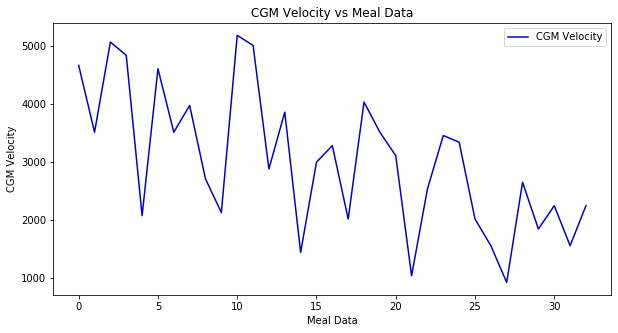

In [23]:
#Plotting CGM Velocity vs Meal Data
plt.figure(figsize=(10,5))
plt.plot(updatedfeatureMatrix['maximumVelocity'], 'r-' , color = 'mediumblue', label = 'CGM Velocity')
plt.xlabel("Meal Data")
plt.ylabel("CGM Velocity")
plt.title("CGM Velocity vs Meal Data")
plt.legend()
plt.show()

In [24]:
#Inserting features in feature matrix
#Fast Fourier Transform 
updatedfeatureMatrix['FFT1']= newFFT['FFT1']
updatedfeatureMatrix['FFT2']= newFFT['FFT2']
updatedfeatureMatrix['FFT3']= newFFT['FFT3']
updatedfeatureMatrix['FFT4']= newFFT['FFT4']
updatedfeatureMatrix['FFT5']= newFFT['FFT5']
updatedfeatureMatrix['FFT1']= newFFT['FFT1']

#Moving Average

updatedfeatureMatrix

,FFT1,FFT2,FFT3,FFT4,FFT5,DWT,mean0-6,mean6-12,mean12-18,mean18-24,mean24-30,maximumVelocity
0,5105.0,315.231637,315.231637,210.702384,210.702384,231.745084,92.000000,101.666667,170.000000,230.833333,256.333333,4665.599997
1,9207.0,19.203178,19.203178,23.430749,23.430749,322.745084,249.666667,315.333333,348.500000,334.166667,286.833333,3513.600045
2,5858.0,112.537069,112.537069,52.832186,52.832186,245.245084,124.333333,136.000000,200.500000,264.500000,251.000000,5068.800064
3,4587.0,149.395871,149.395871,1090.843661,1090.843661,202.245084,94.500000,92.833333,148.000000,208.000000,221.166667,4838.400061
4,4305.0,79.034704,79.034704,12.974602,12.974602,139.245084,120.666667,133.166667,163.500000,158.000000,142.166667,2073.599901
5,4831.0,171.107745,171.107745,133.551488,133.551488,197.081030,90.500000,103.333333,178.500000,219.500000,213.333333,4608.000058
6,4250.0,117.752258,117.752258,27.639121,27.639121,159.245084,103.500000,106.166667,145.333333,182.833333,170.500000,3513.600045
7,4611.0,1126.411906,1126.411906,159.053810,159.053810,202.245084,94.000000,93.666667,144.000000,208.500000,228.333333,3974.399997
8,4377.0,149.284235,149.284235,104.404490,104.404490,159.245084,101.833333,115.000000,152.333333,176.000000,184.333333,2707.200016
9,4604.0,110.315508,110.315508,13.312085,13.312085,164.245084,128.166667,149.500000,186.666667,166.166667,136.833333,2126.946030


In [25]:
#5.Entropy 
#Function to calculate entropy of each row
def calculateEntropy(series):
    numberofSeries = series.value_counts()
    entropyvalues = entropy(numberofSeries)  
    return entropyvalues

entropyTest = pd.DataFrame()
entropyTest['Entropy'] = cgmcopy.apply(lambda row: calculateEntropy(row), axis=1) 
entropyTest

updatedfeatureMatrix['Entropy'] = cgmcopy.apply(lambda row: calculateEntropy(row), axis=1) 
updatedfeatureMatrix

,FFT1,FFT2,FFT3,FFT4,FFT5,DWT,mean0-6,mean6-12,mean12-18,mean18-24,mean24-30,maximumVelocity,Entropy
0,5105.0,315.231637,315.231637,210.702384,210.702384,231.745084,92.000000,101.666667,170.000000,230.833333,256.333333,4665.599997,3.135265
1,9207.0,19.203178,19.203178,23.430749,23.430749,322.745084,249.666667,315.333333,348.500000,334.166667,286.833333,3513.600045,3.170148
2,5858.0,112.537069,112.537069,52.832186,52.832186,245.245084,124.333333,136.000000,200.500000,264.500000,251.000000,5068.800064,3.198917
3,4587.0,149.395871,149.395871,1090.843661,1090.843661,202.245084,94.500000,92.833333,148.000000,208.000000,221.166667,4838.400061,2.950426
4,4305.0,79.034704,79.034704,12.974602,12.974602,139.245084,120.666667,133.166667,163.500000,158.000000,142.166667,2073.599901,2.884467
5,4831.0,171.107745,171.107745,133.551488,133.551488,197.081030,90.500000,103.333333,178.500000,219.500000,213.333333,4608.000058,3.106497
6,4250.0,117.752258,117.752258,27.639121,27.639121,159.245084,103.500000,106.166667,145.333333,182.833333,170.500000,3513.600045,3.106497
7,4611.0,1126.411906,1126.411906,159.053810,159.053810,202.245084,94.000000,93.666667,144.000000,208.500000,228.333333,3974.399997,2.994328
8,4377.0,149.284235,149.284235,104.404490,104.404490,159.245084,101.833333,115.000000,152.333333,176.000000,184.333333,2707.200016,3.089055
9,4604.0,110.315508,110.315508,13.312085,13.312085,164.245084,128.166667,149.500000,186.666667,166.166667,136.833333,2126.946030,3.106497


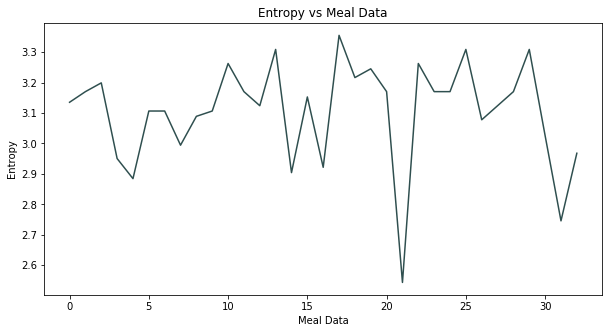

In [26]:
#Visualizing Entropy Values 
plt.figure(figsize=(10,5))
plt.plot(updatedfeatureMatrix['Entropy'], 'r-' , color = 'darkslategrey')
plt.xlabel("Meal Data")
plt.ylabel("Entropy")
plt.title("Entropy vs Meal Data")
plt.show()

In [27]:
#PROVIDING FEATURE MATRIX TO PCA ###########################
#Standardizing feature matrix
updatedfeatureMatrix = StandardScaler().fit_transform(updatedfeatureMatrix)

#Taking Top 5 Components for PCA
pca = PCA(n_components = 5)
principalComponents = pca.fit(updatedfeatureMatrix)
print(principalComponents.components_)

[[ 0.4122384   0.03590644  0.03590644  0.06047205  0.06048108  0.41363361
   0.21717158  0.26562948  0.38054369  0.39164989  0.35486125  0.27689099
   0.17479299]
 [-0.10679671  0.38752925  0.38752925  0.34320571  0.34318949  0.05154199
  -0.34407282 -0.36482738 -0.18514934  0.09049249  0.23424917  0.31310547
  -0.05611476]
 [ 0.00455832 -0.45802593 -0.45802593  0.51475139  0.51476387 -0.04502114
  -0.02177293  0.009937    0.06978156  0.00611705 -0.04180182  0.03695166
  -0.19958326]
 [ 0.03313254  0.31480888  0.31480888  0.29832657  0.2983173   0.08964245
   0.51067383  0.34486963 -0.12208157 -0.2542246  -0.17071507 -0.3525927
  -0.04408078]
 [ 0.13516552  0.08460058  0.08460058 -0.10153186 -0.10159681 -0.06001688
  -0.07551192  0.08398256  0.1395032   0.14237373  0.19567975 -0.18314123
  -0.90491176]]


In [28]:
principalComponentsTrans = pca.fit_transform(updatedfeatureMatrix)
pc5Matrix = pd.DataFrame(data = principalComponentsTrans, columns = ['Principal Component 1', 'Principal Component 2','Principal Component 3', 'Principal Component 4','Principal Component 5'])
pc5Matrix

,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4,Principal Component 5
0,2.177574,1.818200,0.323319,-0.862375,0.036327
1,8.647446,-3.809374,0.191492,1.276107,1.476476
2,3.432584,0.095871,-0.012498,-1.392169,-0.061447
3,1.512379,4.796400,5.999426,1.854009,-0.364809
4,-0.930985,-1.225594,0.248191,0.011739,1.275430
5,1.362863,0.922503,0.412286,-1.288224,0.066851
6,-0.240409,-0.131086,-0.060649,-0.911234,-0.070406
7,0.988879,3.474148,-2.153828,0.971748,1.107764
8,-0.200005,-0.022147,0.279787,-0.333828,0.166210
9,0.000289,-1.514638,-0.083927,0.200290,0.184422


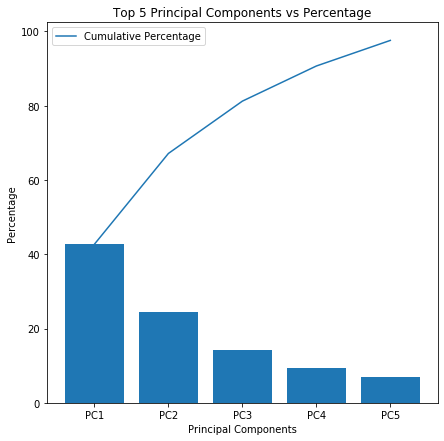

In [29]:
#Plotting Principal Components vs Percentage Variance 
pComponents = ['PC1','PC2','PC3','PC4','PC5']
plt.figure(figsize=(7,7))
plt.title("Top 5 Principal Components vs Percentage")
plt.bar(pComponents, principalComponents.explained_variance_ratio_*100)
plt.plot(np.cumsum(principalComponents.explained_variance_ratio_*100), label = 'Cumulative Percentage')
plt.xlabel("Principal Components")
plt.ylabel("Percentage")
plt.legend()
plt.savefig('')

In [30]:
print(principalComponents.explained_variance_ratio_.cumsum())

[0.42712108 0.67151278 0.81244837 0.9070594  0.9760181 ]


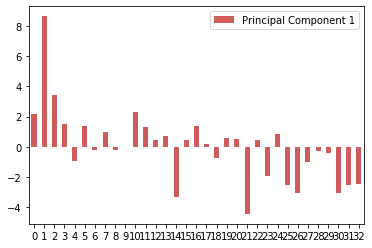

In [31]:
#plotting top 5 principle components against each time series
#Principal Component 1
pc1 = pc5Matrix.plot.bar(y ='Principal Component 1', color = 'indianred', rot = 0)


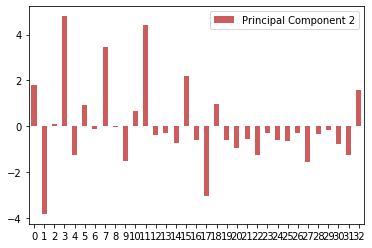

In [32]:
#Principal Component 2
pc2 = pc5Matrix.plot.bar(y ='Principal Component 2', color = 'indianred', rot = 0)

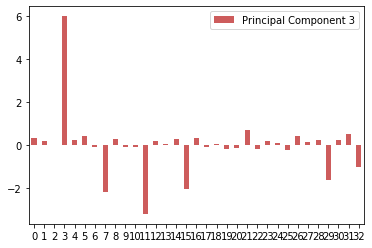

In [33]:
#Principal Component 3
pc3 = pc5Matrix.plot.bar(y ='Principal Component 3', color = 'indianred', rot = 0)

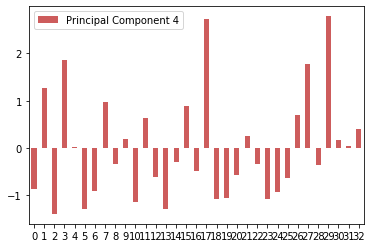

In [34]:
#Principal Component 4
pc4 = pc5Matrix.plot.bar(y ='Principal Component 4', color = 'indianred', rot = 0)

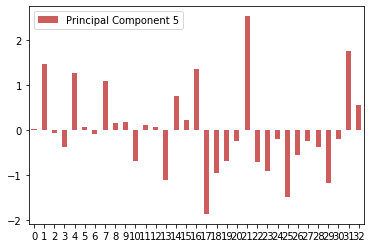

In [35]:
#Principal Component 5
pc5 = pc5Matrix.plot.bar(y ='Principal Component 5', color = 'indianred' ,rot = 0)

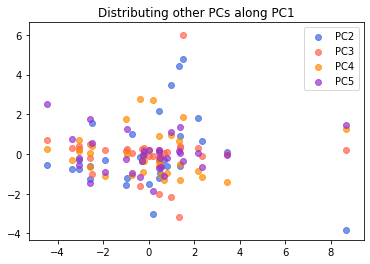

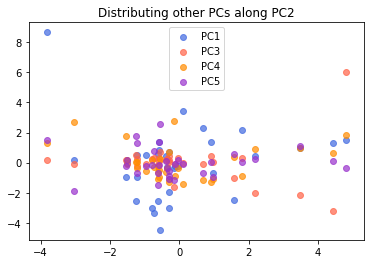

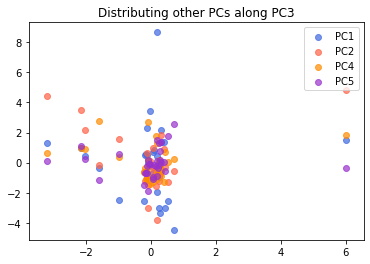

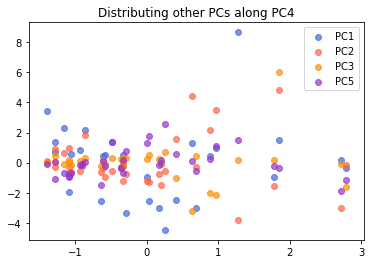

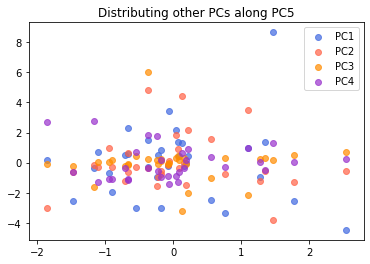

In [36]:
#Plotting Distribution of Principal Components amongst other Principal Components

updatedfeatureMatrix = pca.fit_transform(updatedfeatureMatrix)

#Plotting for PC1
plt.title("Distributing other PCs along PC1")
plt.scatter(updatedfeatureMatrix[:,0], updatedfeatureMatrix[:,1], c='royalblue', label='PC2', alpha = 0.7)
plt.scatter(updatedfeatureMatrix[:,0], updatedfeatureMatrix[:,2], c='tomato', label='PC3', alpha = 0.7)
plt.scatter(updatedfeatureMatrix[:,0], updatedfeatureMatrix[:,3], c='darkorange', label='PC4', alpha = 0.7)
plt.scatter(updatedfeatureMatrix[:,0], updatedfeatureMatrix[:,4], c='darkorchid', label='PC5', alpha = 0.7)
plt.legend()
plt.show()

#Plotting for PC2
plt.title("Distributing other PCs along PC2")
plt.scatter(updatedfeatureMatrix[:,1], updatedfeatureMatrix[:,0], c='royalblue', label='PC1', alpha = 0.7)
plt.scatter(updatedfeatureMatrix[:,1], updatedfeatureMatrix[:,2], c='tomato', label='PC3', alpha = 0.7)
plt.scatter(updatedfeatureMatrix[:,1], updatedfeatureMatrix[:,3], c='darkorange', label='PC4', alpha = 0.7)
plt.scatter(updatedfeatureMatrix[:,1], updatedfeatureMatrix[:,4], c='darkorchid', label='PC5', alpha = 0.7)
plt.legend()
plt.show()

#Plotting for PC3
plt.title("Distributing other PCs along PC3")
plt.scatter(updatedfeatureMatrix[:,2], updatedfeatureMatrix[:,0], c='royalblue', label='PC1', alpha = 0.7)
plt.scatter(updatedfeatureMatrix[:,2], updatedfeatureMatrix[:,1], c='tomato', label='PC2', alpha = 0.7)
plt.scatter(updatedfeatureMatrix[:,2], updatedfeatureMatrix[:,3], c='darkorange', label='PC4', alpha = 0.7)
plt.scatter(updatedfeatureMatrix[:,2], updatedfeatureMatrix[:,4], c='darkorchid', label='PC5', alpha = 0.7)
plt.legend()
plt.show()

#Plotting for PC4
plt.title("Distributing other PCs along PC4")
plt.scatter(updatedfeatureMatrix[:,3], updatedfeatureMatrix[:,0], c='royalblue', label='PC1', alpha = 0.7)
plt.scatter(updatedfeatureMatrix[:,3], updatedfeatureMatrix[:,1], c='tomato', label='PC2', alpha = 0.7)
plt.scatter(updatedfeatureMatrix[:,3], updatedfeatureMatrix[:,2], c='darkorange', label='PC3', alpha = 0.7)
plt.scatter(updatedfeatureMatrix[:,3], updatedfeatureMatrix[:,4], c='darkorchid', label='PC5', alpha = 0.7)
plt.legend()
plt.show()

#Plotting for PC5
plt.title("Distributing other PCs along PC5")
plt.scatter(updatedfeatureMatrix[:,4], updatedfeatureMatrix[:,0], c='royalblue', label='PC1', alpha = 0.7)
plt.scatter(updatedfeatureMatrix[:,4], updatedfeatureMatrix[:,1], c='tomato', label='PC2', alpha = 0.7)
plt.scatter(updatedfeatureMatrix[:,4], updatedfeatureMatrix[:,2], c='darkorange', label='PC3', alpha = 0.7)
plt.scatter(updatedfeatureMatrix[:,4], updatedfeatureMatrix[:,3], c='darkorchid', label='PC4', alpha = 0.7)
plt.legend()
plt.show()

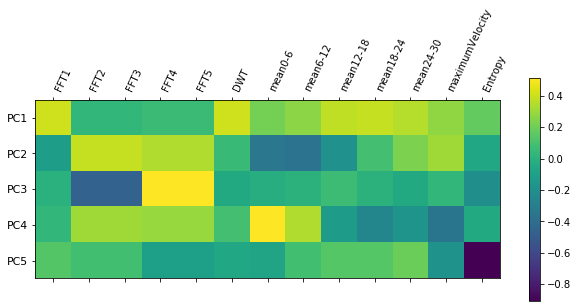

In [37]:
plt.matshow(pca.components_,cmap='viridis')
plt.yticks([0,1,2,3,4],['PC1','PC2','PC3', 'PC4', 'PC5'],fontsize=11)
plt.colorbar()
plt.xticks(range(0,13), ['FFT1',	'FFT2',	'FFT3',	'FFT4',	'FFT5',	'DWT',	'mean0-6',	'mean6-12',	'mean12-18',	'mean18-24',	'mean24-30',	'maximumVelocity','Entropy'], rotation=65,ha='left')
plt.show()